# Glass Identification Project

#### Importing Libraries

In [1]:

import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.base import TransformerMixin 
# To create new classes for transformations

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
# preprocessing 



from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:

data = pd.read_csv('Glass Identification.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Exploratory Data Analysis





In [88]:
#Calculating number of nulls

data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [89]:
#Shape of Data

data.shape

(214, 11)

###### 214 observations

In [90]:
#Unique values in labels

data[10].unique()


array([1, 2, 3, 5, 6, 7], dtype=int64)

In [91]:
# Checking Data type of Columns

data.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

<AxesSubplot:xlabel='10', ylabel='Count'>

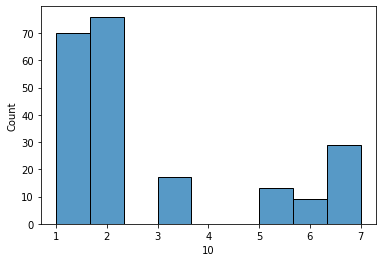

In [101]:
#Checking for unbalanced dataset

data[10].value_counts()



sns.histplot(x=10, data=data)

##### The dataset is unbalanced. 

Type 1 and 2 constitute more than 60% of the data

 

# **Data Preprocessing (Preparing Dataset)**

# **Attribute Information:**

Id number: 1 to 214 (removed from CSV file)

*   RI: refractive index
*   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
*   Mg: Magnesium
*   Al: Aluminum
*   K: Potassium
*   Ca: Calcium
*   Ba: Barium
*   Fe: Iron
*   Type of glass: (class attribute)  [1-7]
    1.   Building_windows_float_processed
    2.   Building_windows_non_float_processed
    3.   Vehicle_windows_float_processed
    4.   Vehicle_windows_non_float_processed
    5.   Containers
    6.   Tableware
    7.   Headlamps




















#### Adding column names

In [102]:

names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = names
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Removing unnecessary columns


In [63]:
data = data.drop('Id',1)

In [64]:

data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


### Statistics of Dataset



In [65]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


*We have to normalize the data first as they are not in same scale range*


# **Data Visualization** 

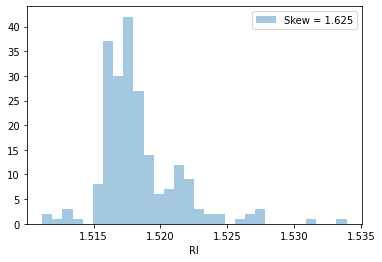

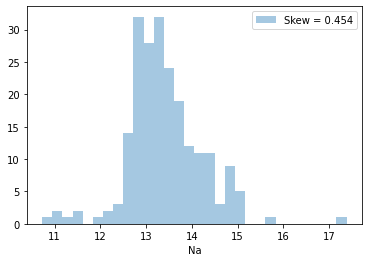

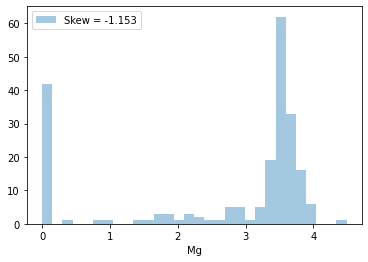

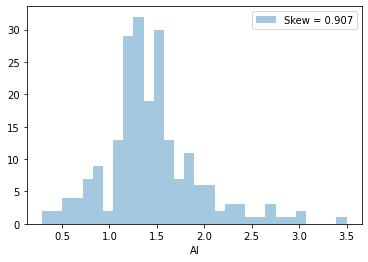

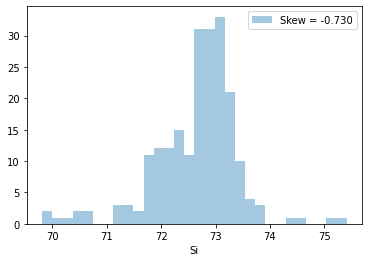

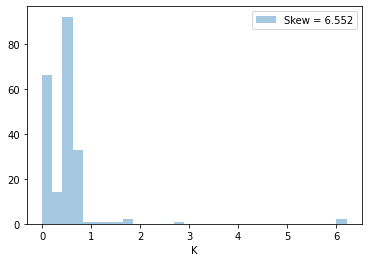

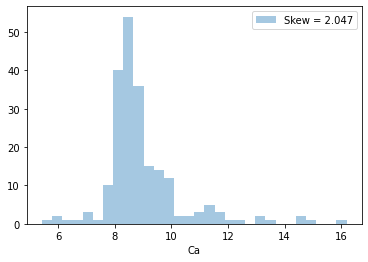

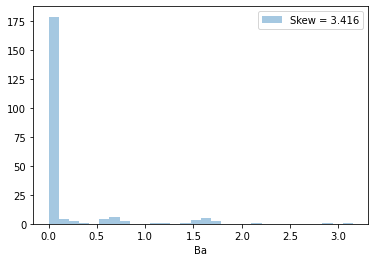

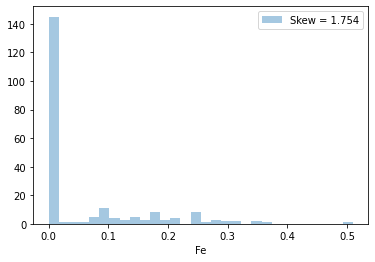

In [103]:
#Checking skewness


for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

**Result** 
->. Seem to contain many outliers. 
->. They are Highly Skewed 


##  Using Multivariate Plots 

<Figure size 576x576 with 0 Axes>

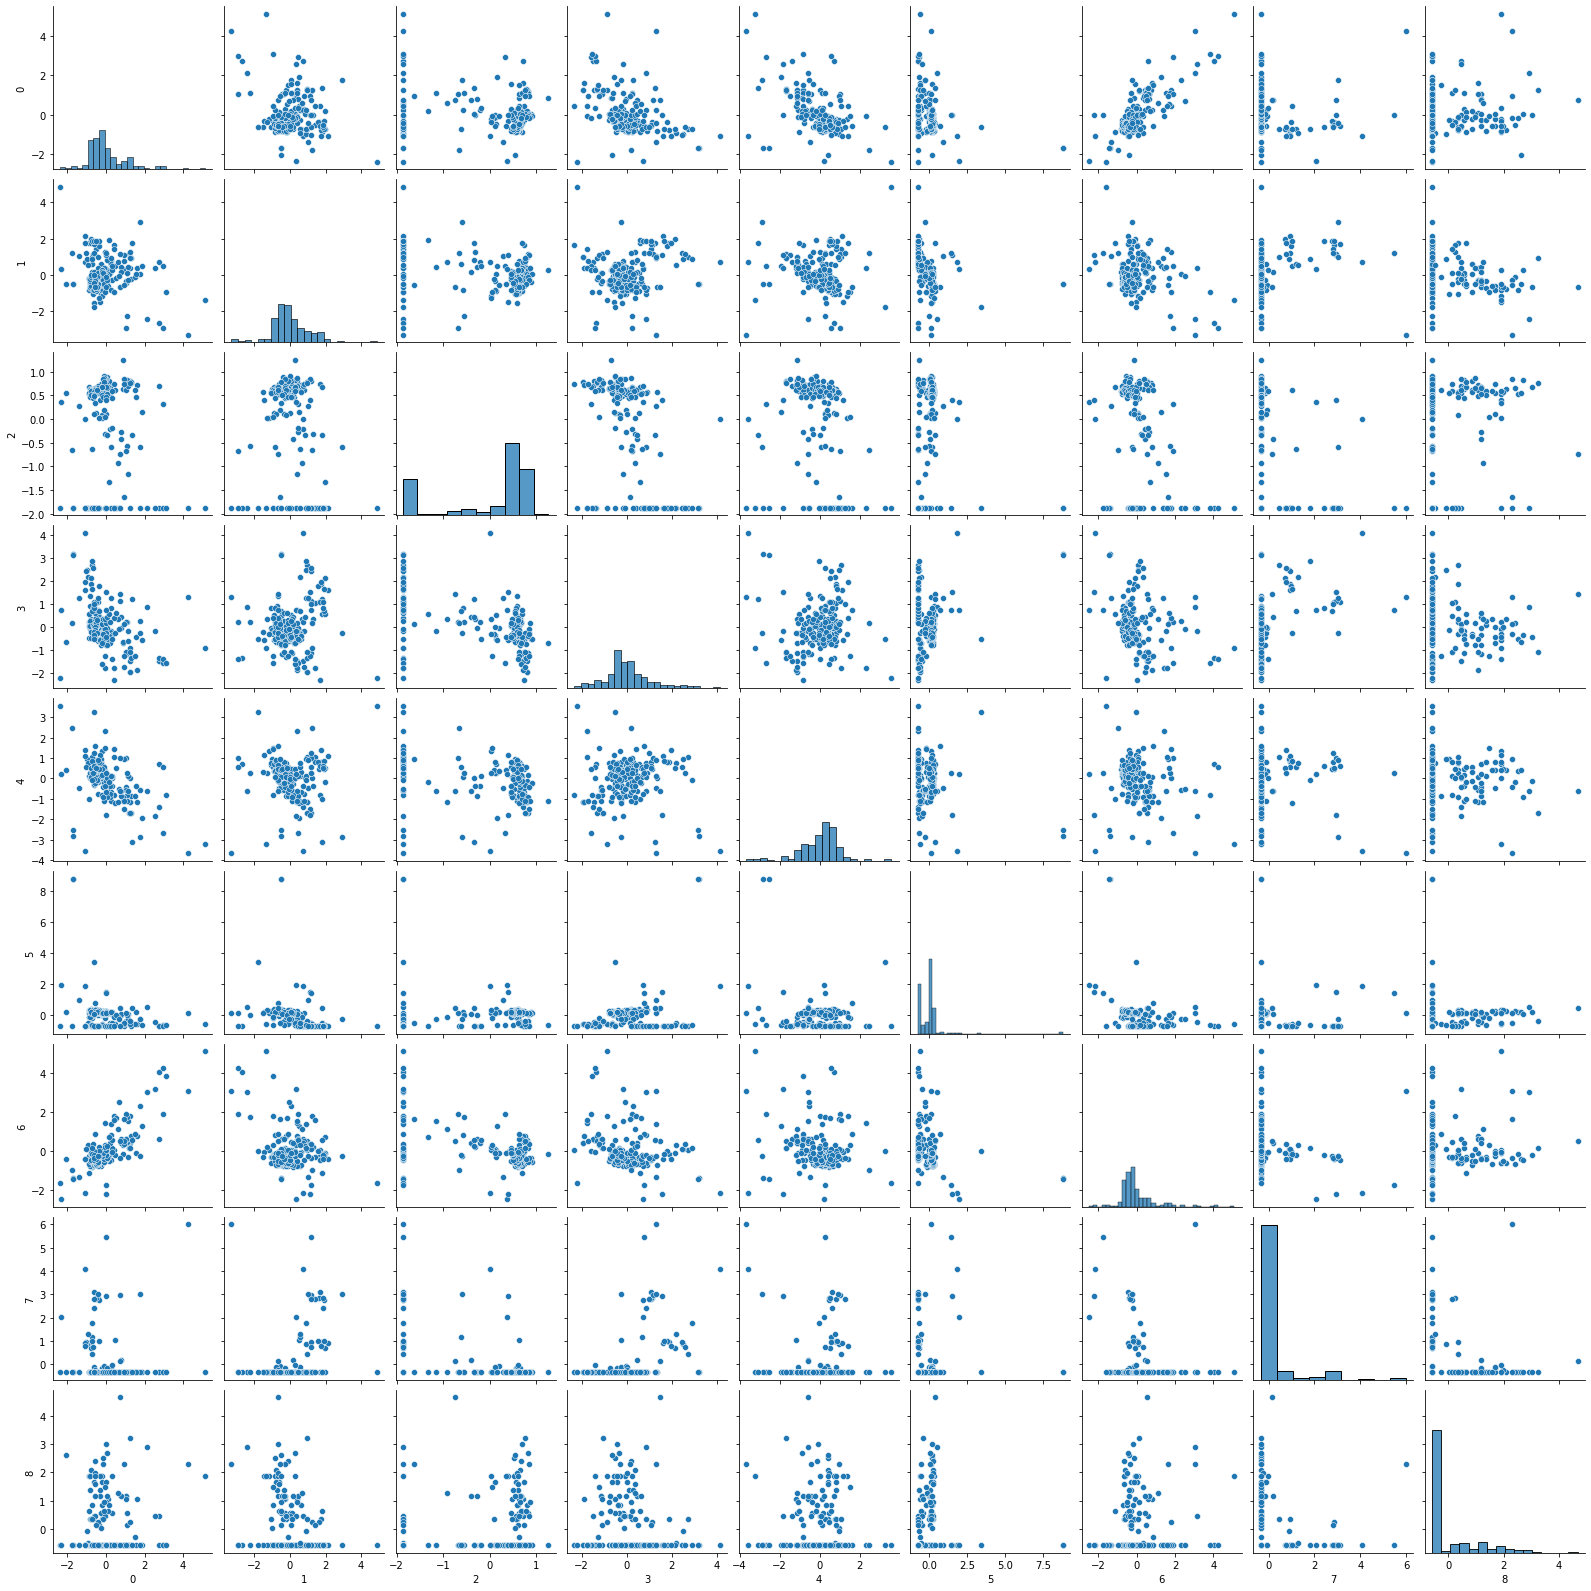

In [104]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

## Using Correlation Matrix


In [106]:

# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

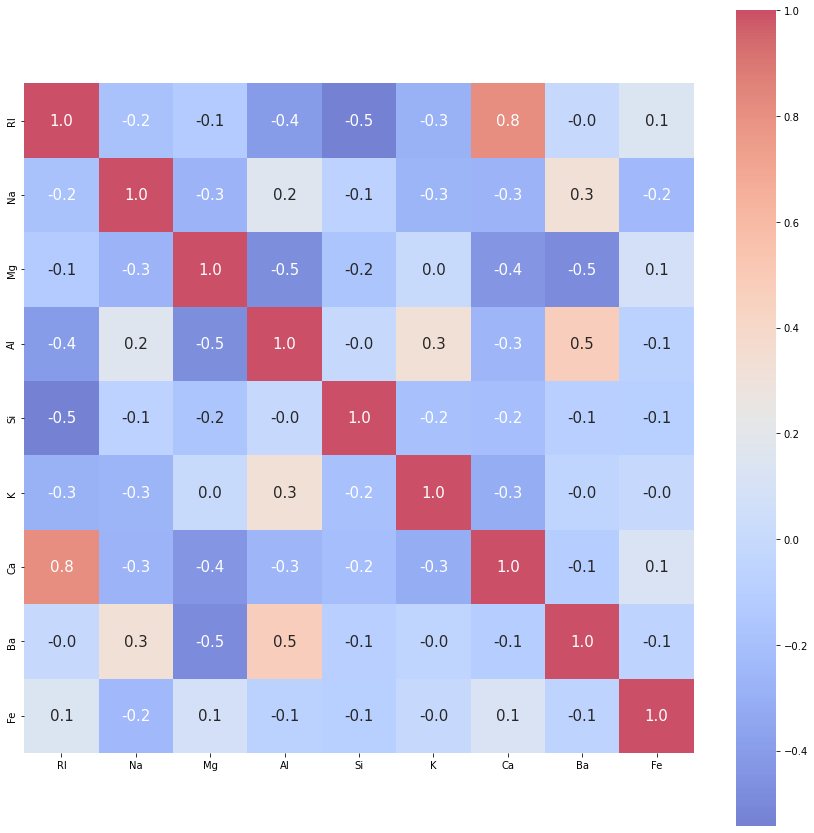

In [107]:

coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

**Outcomes** 

1. AI and Ba have intermediate correlation between each other.
2. RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

# **Outlier Detection** 

In [71]:
# Detect observations with more than one outlier

def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in data.columns.tolist():
       
        Q1 = np.percentile(data[col], 25)
        
       
        Q3 = np.percentile(data[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col)
        
   
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))   

The dataset contains 14 observations with more than 2 outliers


**Outcomes** 

1. In our data, There exists around 14 observations with multiple outliers.
2. These could harm the efficiency of our learning algorithms. We'll remove them now.

# **Data Treatment** 

In [72]:
#Information about data in hand 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**Outcomes** 

1. This dataset is clean; there aren't any missing values in it.

## *1. Removing Outliers*

In [73]:
outlier_indices = outlier_hunt(data[features])
df = data.drop(outlier_indices).reset_index(drop=True)

print(data.shape)

(214, 10)


**Outcomes** 

1. Removing observations with multiple outliers (more than 2) left us with 200 observations to train from.

## *2. Normalizing The Data*

In [74]:
## normalizing/Scalling the data in [0,1] Range 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [76]:
y.head(2)


,glass_type
0,1
1,1


## *3. Scaling The Features*

In [77]:

from sklearn import preprocessing
X=preprocessing.scale(X)

## **Visualization of Data after Being Preprocessed**

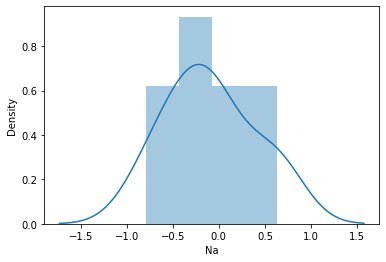

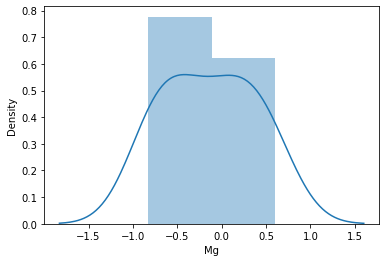

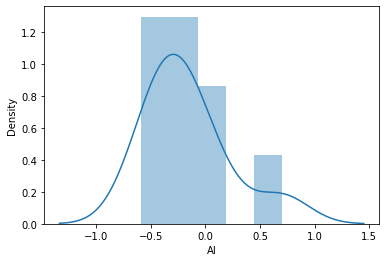

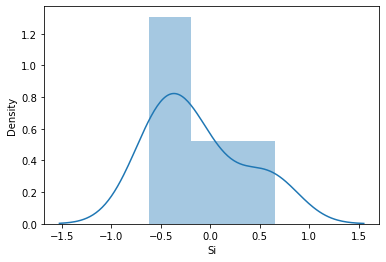

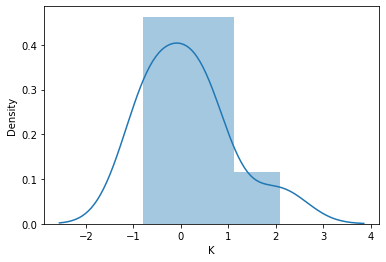

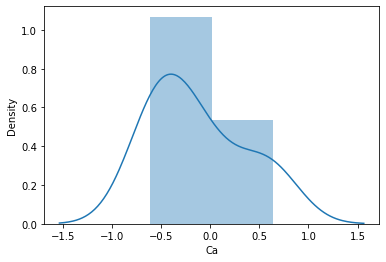

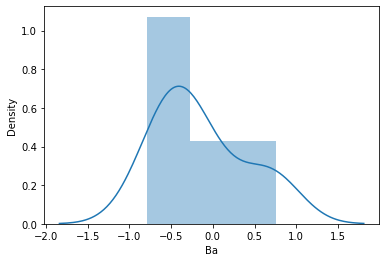

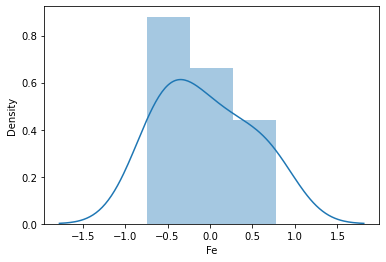

In [78]:
x2 = X


for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

**Outcomes** 

According to Diagrams above, After preprocessing,
1. Skewness is reduced.
2. Data is more normalized.

## **Training set - Test set Split**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()



# **Training Different Machine learning Models** 

## ***1. K-Nearest Neighbors*** 

In [80]:

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.65625
[0.6666666666666666, 0.6296296296296297, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7222222222222222, 0.7407407407407407, 0.7222222222222222, 0.7407407407407407]


## ***2. Decision Tree*** 

In [81]:

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)


1.0
[0.7037037037037037]


## ***3. Logistic Regression*** 

In [82]:

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.65
[0.6296296296296297]


## ***4. SVM Classifier (Non-Linear)*** 

In [83]:

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.76875
[0.7407407407407407]


# ***Result***

## Best models:

**Decision Tree**


Decision tree is overfitting with  **:->**

*Training accuracy: 1.0*

*Testing accuracy:  0.7037037037037037*




**SVM (Non Linear Kernal)**

SVM (Non Linear Kernal) is giving best result with:

*Training accuracy: 0.76875*

*Testing accuracy:  0.7407407407407407*